## CSE 422 Introduction to Data Preprocessing
---







### What are the advantages of preprocessing the data before applying on machine learning algorithm?

"The biggest advantage of pre-processing in ML is to improve **generalizablity** of your model. Data for any ML application is collected through some ‘sensors’. These sensors can be physical devices, instruments, software programs such as web crawlers, manual surveys, etc. Due to hardware malfunctions, software glitches, instrument failures, amd human errors, noise and erroneous information may creep in that can severely affect the performance of your model. Apart from **noise**, there are several **redundant information** that needs to be removed. For e.g. while predicting whether it rains tomorrow or not, age of the person is irrelevant. In terms of text processing, there are several stop words that may be redundant for the analysis. Lastly, there may be several **outliers** present in your data, due to the way data is collected that may need to be removed to improve the performance of the classifiers."
                                    
                                            -Shehroz Khan, ML Researcher, Postdoc @U of Toronto


Some Data Preprocessing Techniques:

* Deleting duplicate and null values
* Imputation for missing values
* Handling Categorical Features
* Feature Normalization/Scaling
* Feature Engineering
* Feature Selection

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np


#Removing Null values / Handling Missing data




In [2]:
volunteer = pd.read_csv('sampleData/volunteer_opportunities.csv')
volunteer.head(3)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
volunteer.shape

(665, 35)

In [4]:
volunteer.isnull().sum()

opportunity_id          0
content_id              0
vol_requests            0
event_time              0
title                   0
hits                    0
summary                 0
is_priority           603
category_id            48
category_desc          48
amsl                  665
amsl_unit             665
org_title               0
org_content_id          0
addresses_count         0
locality               70
region                  0
postalcode              6
primary_loc           665
display_url             0
recurrence_type         0
hours                   0
created_date            0
last_modified_date      0
start_date_date         0
end_date_date           0
status                  0
Latitude              665
Longitude             665
Community Board       665
Community Council     665
Census Tract          665
BIN                   665
BBL                   665
NTA                   665
dtype: int64

dropping columns

In [5]:
volunteer = volunteer.drop(['BIN', 'BBL', 'NTA'], axis = 1)
volunteer.shape

(665, 32)

dropping rows

In [6]:
# Check how many values are missing in the category_desc column
print("Number of rows with null values in category_desc column: ", volunteer['category_desc'].isnull().sum())

# Subset the volunteer dataset

volunteer_subset = volunteer[volunteer['category_desc'].notnull()]

# Print out the shape of the subset
print("Shape after removing null values: ", volunteer_subset.shape)

Number of rows with null values in category_desc column:  48
Shape after removing null values:  (617, 32)


In [7]:
print("Shape of dataframe before dropping:", volunteer.shape)
volunteer = volunteer.dropna(axis = 0, subset = ['category_desc'])
print("Shape after dropping:", volunteer.shape)

Shape of dataframe before dropping: (665, 32)
Shape after dropping: (617, 32)


### Imputing missing Values

In [8]:
sales = pd.read_csv('sampleData/sales.csv', index_col = ['month'])
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,NaN,52
Jun,205,60.0,55


In [9]:
sales.fillna(50)

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,50.0,52
Jun,205,60.0,55


In [10]:
sales = pd.read_csv('sampleData/sales.csv', index_col = ['month'])

In [11]:
sales[['salt']]

,salt
month,
Jan,12.0
Feb,50.0
Mar,89.0
Apr,87.0
May,NaN
Jun,60.0


In [12]:
from sklearn.impute import SimpleImputer

impute = SimpleImputer(missing_values=np.nan, strategy='mean')

impute.fit(sales[['salt']])

sales['salt'] = impute.transform(sales[['salt']])

In [13]:
sales

,eggs,salt,spam
month,,,
Jan,47,12.0,17
Feb,110,50.0,31
Mar,221,89.0,72
Apr,77,87.0,20
May,132,59.6,52
Jun,205,60.0,55


## Standardizing Data

## Feature Scaling

## Why do we need to scale our data?
* If a feature’s variance is orders of magnitude more than the variance of other features, that particular feature might dominate other features in the dataset and make the estimator unable to learn from other features correctly, i.e. our learner might give more importance to features with high variance, which is not something we want happening in our model.

The following are a few different types of Scalers:


**MinMax Scaler:**

Scales values to a range between 0 and 1 if no negative values, and -1 to 1 if there are negative values present.

$$\frac{X - X_{min}}{X_{max} - X_{min}}$$

where,

 $$X\space is\space a\space feature\space value.$$
 $$X_{min} \space and \space X_{max} \space are \space corresponding \space feature's \space min \space and \space max \space values. $$


**Standard Scaler:**

$$\frac{X - mean}{\sigma}$$
where,
$$\sigma = standard \space deviation $$

**Robust Scaler:**

Uses statistics that are robust to outliers

$$\frac{X - median}{IQR}$$

where,

$$ IQR = Inter\space Quartile\space Range = Q_3 - Q_1 $$


Sklearn library provides functions for different scalers by which we can easily scale our data.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

MinMaxScaler()

In [16]:
# transform data
X_train_scaled = scaler.transform(X_train)

We can see that after Min-Max Scaling all the values are in the range [0,1]

In [17]:
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))

per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]


In [18]:
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [19]:
# transform test data
X_test_scaled = scaler.transform(X_test)


## Effect of using MinMax Scaler:

### Accuracy without scaling

In [20]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.94


### We can see that accuracy improves if we train on scaled data.

In [21]:
# preprocessing using 0-1 scaling
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}".format(
    knn.score(X_test_scaled, y_test)))

Scaled test set accuracy: 0.96


### Effect using Standard Scaler:
We can see that accuracy has improved compared to the non-scaled version, but we can infer that for this problem, Standard Scaler performs worse than MinMaxScaler.

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#instead of using .fit() and .transform() separately, we can use .fit_transform()
X_scaled_d = scaler.fit_transform(X_train)

In [23]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# learning an SVM on the scaled training data
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("KNN test accuracy: {:.2f}".format(knn.score(X_test_scaled, y_test)))

KNN test accuracy: 0.95


## Feature Engineering

### Encoding categorical variables - binary


In [24]:
hiking = pd.read_json('sampleData/hiking.json')
hiking.head()

,Prop_ID,Name,Location,Park_Name,Length,Difficulty,Other_Details,Accessible,Limited_Access,lat,lon
0,B057,Salt Marsh Nature Trail,"Enter behind the Salt Marsh Nature Center, loc...",Marine Park,0.8 miles,None,<p>The first half of this mile-long trail foll...,Y,N,NaN,NaN
1,B073,Lullwater,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,1.0 mile,Easy,Explore the Lullwater to see how nature thrive...,N,N,NaN,NaN
2,B073,Midwood,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.75 miles,Easy,Step back in time with a walk through Brooklyn...,N,N,NaN,NaN
3,B073,Peninsula,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Discover how the Peninsula has changed over th...,N,N,NaN,NaN
4,B073,Waterfall,Enter Park at Lincoln Road and Ocean Avenue en...,Prospect Park,0.5 miles,Easy,Trace the source of the Lake on the Waterfall ...,N,N,NaN,NaN


In [25]:
hiking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Prop_ID         33 non-null     object 
 1   Name            33 non-null     object 
 2   Location        33 non-null     object 
 3   Park_Name       33 non-null     object 
 4   Length          29 non-null     object 
 5   Difficulty      27 non-null     object 
 6   Other_Details   31 non-null     object 
 7   Accessible      33 non-null     object 
 8   Limited_Access  33 non-null     object 
 9   lat             0 non-null      float64
 10  lon             0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 3.0+ KB


In [26]:
hiking['Accessible'].unique()

array(['Y', 'N'], dtype=object)

In [27]:
from sklearn.preprocessing import LabelEncoder

# Set up the LabelEncoder object
enc = LabelEncoder()

# Apply the encoding to the "Accessible" column
hiking['Accessible_enc'] = enc.fit_transform(hiking['Accessible'])

# Compare the two columns
print(hiking[['Accessible', 'Accessible_enc']].head())

  Accessible  Accessible_enc
0          Y               1
1          N               0
2          N               0
3          N               0
4          N               0


We may also encode/map a certain class to a specific code (e.g 0/1/2) by using the `map()` function.

In [28]:
hiking['Accessible'] = hiking['Accessible'].map({'good':2,'bad':0,'average':1})

In [29]:
volunteer = pd.read_csv('sampleData/volunteer_opportunities.csv')
volunteer.head(3)

,opportunity_id,content_id,vol_requests,event_time,title,hits,summary,is_priority,category_id,category_desc,...,end_date_date,status,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA
0,4996,37004,50,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,...,July 30 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5008,37036,2,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,Strengthening Communities,...,February 01 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5016,37143,20,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,Strengthening Communities,...,January 29 2011,approved,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Encoding categorical variables - one-hot encoding

In [30]:
volunteer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   opportunity_id      665 non-null    int64  
 1   content_id          665 non-null    int64  
 2   vol_requests        665 non-null    int64  
 3   event_time          665 non-null    int64  
 4   title               665 non-null    object 
 5   hits                665 non-null    int64  
 6   summary             665 non-null    object 
 7   is_priority         62 non-null     object 
 8   category_id         617 non-null    float64
 9   category_desc       617 non-null    object 
 10  amsl                0 non-null      float64
 11  amsl_unit           0 non-null      float64
 12  org_title           665 non-null    object 
 13  org_content_id      665 non-null    int64  
 14  addresses_count     665 non-null    int64  
 15  locality            595 non-null    object 
 16  region  

In [31]:
volunteer['category_desc'].unique()

array([nan, 'Strengthening Communities', 'Environment',
       'Helping Neighbors in Need', 'Health', 'Education',
       'Emergency Preparedness'], dtype=object)

In [32]:
# Transform the category_desc column
category_enc = pd.get_dummies(volunteer['category_desc'])

# Take a look at the encoded columns
category_enc.head()

,Education,Emergency Preparedness,Environment,Health,Helping Neighbors in Need,Strengthening Communities
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,False,False,False,True
4,False,False,True,False,False,False


In [33]:
volunteer['category_desc'].head()

0                          NaN
1    Strengthening Communities
2    Strengthening Communities
3    Strengthening Communities
4                  Environment
Name: category_desc, dtype: object

##Feature Engineering

### Engineering numerical features - by taking an average

Suppose we have multiple features each of which contains time taken for each runner to complete a lap. We can reduce the dimensionality of our dataset (reduce the number of features) by averaging(mean) the time taken of each run.

In [34]:
running_times_5k = pd.DataFrame([['Sue', 20.1, 18.5, 19.6, 20.3, 18.3], ['Mark', 16.5, 17.1, 16.9, 17.6, 17.3], ['Sean', 23.5, 25.1, 25.2, 24.6, 23.9], ['Erin', 21.7, 21.1, 20.9, 22.1, 22.2], ['Jenny', 25.8, 27.1, 26.1, 26.7, 26.9], ['Russell', 30.9, 29.6, 31.4, 30.4, 29.9]])


In [35]:
running_times_5k.columns =  ['name', 'run1', 'run2', 'run3', 'run4', 'run5']

In [36]:
running_times_5k

,name,run1,run2,run3,run4,run5
0,Sue,20.1,18.5,19.6,20.3,18.3
1,Mark,16.5,17.1,16.9,17.6,17.3
2,Sean,23.5,25.1,25.2,24.6,23.9
3,Erin,21.7,21.1,20.9,22.1,22.2
4,Jenny,25.8,27.1,26.1,26.7,26.9
5,Russell,30.9,29.6,31.4,30.4,29.9


In [37]:
# Create a list of the columns to average
run_columns = ["run1", "run2", "run3", "run4", "run5"]

# Use apply to create a mean column
running_times_5k["mean"] = running_times_5k.apply(lambda row: row[run_columns].mean(), axis=1)

# Take a look at the results
print(running_times_5k)

      name  run1  run2  run3  run4  run5   mean
0      Sue  20.1  18.5  19.6  20.3  18.3  19.36
1     Mark  16.5  17.1  16.9  17.6  17.3  17.08
2     Sean  23.5  25.1  25.2  24.6  23.9  24.46
3     Erin  21.7  21.1  20.9  22.1  22.2  21.60
4    Jenny  25.8  27.1  26.1  26.7  26.9  26.52
5  Russell  30.9  29.6  31.4  30.4  29.9  30.44


### Engineering numerical features - datetime

We are extracting the start_date_month from the `date_time` format which we can use later to input into our learner/model/algorithm. This feature will be much more meaningful for the learner compared to the `date_time` format.

In [38]:
volunteer["start_date_date"]

0          July 30 2011
1      February 01 2011
2       January 29 2011
3      February 14 2011
4      February 05 2011
             ...       
660      August 16 2011
661       April 13 2011
662        July 20 2011
663        June 01 2011
664        July 07 2011
Name: start_date_date, Length: 665, dtype: object

In [39]:
# First, convert string column to date column
volunteer["start_date_converted"] = pd.to_datetime(volunteer["start_date_date"])

# Extract just the month from the converted column
volunteer["start_date_month"] = volunteer["start_date_converted"].apply(lambda row: row.month)

# Take a look at the converted and new month columns
volunteer[['start_date_converted', 'start_date_month']].head()

,start_date_converted,start_date_month
0,2011-07-30,7
1,2011-02-01,2
2,2011-01-29,1
3,2011-02-14,2
4,2011-02-05,2


## Feature Selection

### Selecting relevant features

Sometimes certain circumstances arise that we have a lot of features in our dataset, but from our prior/domain knowledge we know that certain features might not be too important. In such cases we may want to drop those irrelevant features.



In [40]:
# Create a list of redundant column names to drop
to_drop = ["category_desc", "created_date", "locality", "region", "vol_requests"]

# Drop those columns from the dataset
volunteer_subset = volunteer.drop(to_drop, axis=1)

# Print out the head of the new dataset
volunteer_subset.head()

,opportunity_id,content_id,event_time,title,hits,summary,is_priority,category_id,amsl,amsl_unit,...,Latitude,Longitude,Community Board,Community Council,Census Tract,BIN,BBL,NTA,start_date_converted,start_date_month
0,4996,37004,0,Volunteers Needed For Rise Up & Stay Put! Home...,737,Building on successful events last summer and ...,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-07-30,7
1,5008,37036,0,Web designer,22,Build a website for an Afghan business,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-01,2
2,5016,37143,0,Urban Adventures - Ice Skating at Lasker Rink,62,Please join us and the students from Mott Hall...,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-01-29,1
3,5022,37237,0,Fight global hunger and support women farmers ...,14,The Oxfam Action Corps is a group of dedicated...,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-14,2
4,5055,37425,0,Stop 'N' Swap,31,Stop 'N' Swap reduces NYC's waste by finding n...,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-05,2


### Checking for correlated features

We may use the following heatmap to find out the correlation between each of the features in a dataset. If a certain feature is highly correlated with more than one feature, we may choose to drop that feature (in this case it is *flavanoids*) because it will affect our model in a similar way as the other two features (and thus will prove to redundant). Correlation between two features may be found using the color gradient shown on the right.

In [41]:
from sklearn.datasets import load_wine

wine = load_wine()
wine_df = pd.DataFrame( wine['data'], columns=wine['feature_names'])

In [42]:
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [43]:
wine_corr = wine_df.corr()
wine_corr

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


<Axes: >

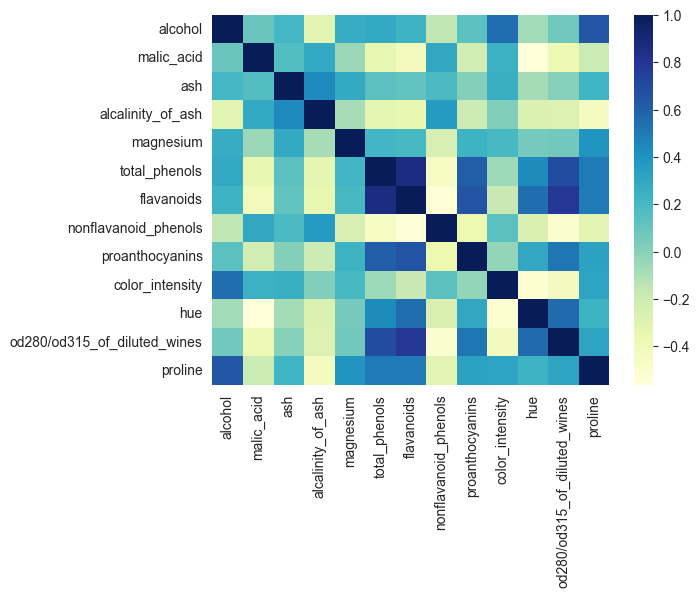

In [44]:
import seaborn as sns

sns.heatmap(wine_corr, cmap = 'YlGnBu')

In [45]:
# Take a minute to find the column where the correlation value is greater than 0.75 at least twice
to_drop = 'flavanoids'

# Drop that column from the DataFrame
wine_df = wine_df.drop(to_drop, axis=1)

## **Summary:**

Basic Pipeline for solving a ML project:

1. Read in Dataset

2. Get to know your dataset using data vizualisation and other techniques

3. Preprocess your dataset:

  * remove/impute null values
  * remove outliers
  * feature scaling
  * feature engineering
  * feature selection

4. train/test split
5. choose and build (number of) machine learning algorithm
5. train model on training data
6. make prediction on test data
7. evaluate performance on test data
8. visualization of your results



---
.

.

**Reference**


* Müller Andreas Christian, and Sarah Guido. Introduction to Machine Learning with Python a Guide for Data Scientists. OReilly, 2018.

* DataCamp Python Course